Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv(r"C:\Users\suert\OneDrive\Documentos\GitHub\Machine_Learning\Entregas\Prueba_Tecnica_Nivel\data\train.csv")

In [8]:
train.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


Comprobamos si hay valores perdidos y vemos que no hay

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

Vemos las estadisticas descripitivas de todo el Dataframe

In [10]:
train.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


Vemos la correlación entre las mismas

In [11]:
train.corr()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,1.000000,-0.622316,-0.182153,-0.272298,-0.495355,0.269412,-0.670282,-0.625041,-0.129477,-0.009559,...,0.022009,0.000314,-0.186106,0.011536,-0.635645,-0.386412,-0.002904,-0.590629,-0.007583,-0.416405
col1,-0.622316,1.000000,0.068536,0.209239,0.296823,-0.110139,0.366900,0.340983,0.169893,-0.001603,...,0.020401,-0.006932,0.232193,-0.012520,0.345596,0.244387,0.000861,0.327539,0.025411,0.358168
col2,-0.182153,0.068536,1.000000,0.055166,0.082996,-0.001662,0.110731,0.121478,0.022057,-0.018710,...,-0.048791,0.008791,-0.058001,0.008801,0.096208,0.049775,0.029816,0.078308,0.024384,-0.017318
col3,-0.272298,0.209239,0.055166,1.000000,0.360306,0.343399,0.355561,0.310508,-0.033510,0.004984,...,-0.092149,0.028841,0.301948,-0.016883,0.328398,0.227257,-0.008053,0.303467,0.002591,-0.132675
col4,-0.495355,0.296823,0.082996,0.360306,1.000000,-0.037666,0.445365,0.416649,0.078317,-0.023541,...,-0.055882,-0.005803,0.317054,-0.006503,0.471041,0.294568,0.033050,0.435385,0.001960,0.104875
col5,0.269412,-0.110139,-0.001662,0.343399,-0.037666,1.000000,-0.138517,-0.152531,-0.120050,0.001908,...,-0.046023,0.019647,-0.014961,-0.011347,-0.141748,-0.093256,0.003784,-0.153398,-0.005593,-0.271454
col6,-0.670282,0.366900,0.110731,0.355561,0.445365,-0.138517,1.000000,0.551453,0.129136,0.012978,...,-0.034044,0.003866,0.384610,-0.027252,0.590410,0.385324,0.006608,0.518238,-0.006657,0.198555
col7,-0.625041,0.340983,0.121478,0.310508,0.416649,-0.152531,0.551453,1.000000,0.121669,-0.001397,...,-0.058285,-0.015734,0.340895,-0.040220,0.516192,0.311134,0.029873,0.513997,-0.004092,0.174420
col8,-0.129477,0.169893,0.022057,-0.033510,0.078317,-0.120050,0.129136,0.121669,1.000000,0.013048,...,0.120507,-0.006042,0.168918,0.015245,0.109354,0.039575,0.008354,0.092649,0.012929,0.031497
col9,-0.009559,-0.001603,-0.018710,0.004984,-0.023541,0.001908,0.012978,-0.001397,0.013048,1.000000,...,0.030067,-0.002626,-0.021988,0.002967,-0.017018,0.006563,0.025123,0.013472,0.006963,0.003556


Hacemos un Heatmap para verlo de una manera más visual

<Axes: >

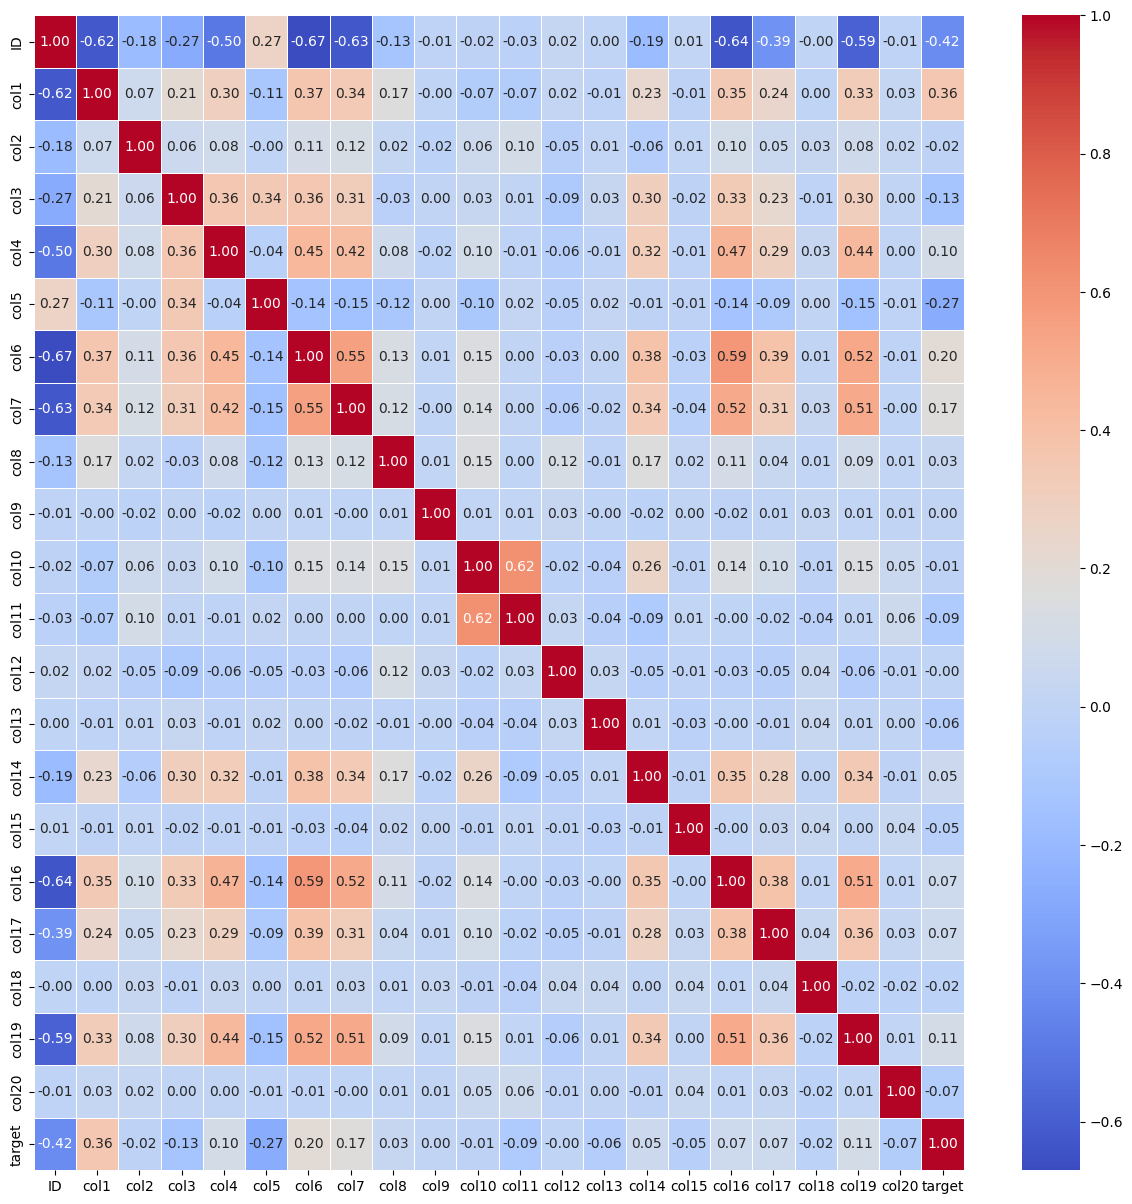

In [12]:
correlation = train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", annot_kws={"size": 10})  

Procedemos a estudiar cada una de las columnas

In [13]:
train["col1"].value_counts()

col1
0.09    414
0.07    404
0.02    393
0.01    381
0.05    377
       ... 
3.21      1
1.53      1
1.28      1
4.63      1
2.87      1
Name: count, Length: 479, dtype: int64

In [14]:
train["col1"].describe()

count    5597.000000
mean        0.674797
std         1.273677
min         0.000000
25%         0.040000
50%         0.070000
75%         0.290000
max         5.050000
Name: col1, dtype: float64

In [15]:
train["col2"].value_counts()

col2
0.37     9
9.92     9
9.82     9
13.74    9
0.17     8
        ..
2.72     1
24.81    1
20.80    1
15.00    1
4.95     1
Name: count, Length: 2320, dtype: int64

In [16]:
train["col2"].describe()

count    5597.000000
mean       14.438840
std         8.851097
min        -0.080000
25%         6.850000
50%        14.390000
75%        22.260000
max        29.840000
Name: col2, dtype: float64

In [17]:
train["col3"].value_counts()

col3
0.04    609
0.02    563
0.03    557
0.01    535
0.05    438
       ... 
0.98      7
1.01      7
1.03      6
1.05      1
1.04      1
Name: count, Length: 107, dtype: int64

In [18]:
train["col3"].describe()

count    5597.000000
mean        0.163603
std         0.254659
min         0.000000
25%         0.030000
50%         0.050000
75%         0.100000
max         1.050000
Name: col3, dtype: float64

In [19]:
train["col4"].value_counts()

col4
0.32    35
0.23    35
0.38    35
0.94    34
0.58    33
        ..
4.57     1
4.48     1
4.21     1
4.69     1
4.88     1
Name: count, Length: 470, dtype: int64

In [20]:
train["col4"].describe()

count    5597.000000
mean        1.579702
std         1.221220
min         0.000000
25%         0.550000
50%         1.210000
75%         2.510000
max         4.940000
Name: col4, dtype: float64

In [21]:
train["col5"].value_counts()

col5
0.060    421
0.040    391
0.070    391
0.090    389
0.050    388
0.020    376
0.030    374
0.080    373
0.010    372
0.001    247
0.100    241
0.008    183
0.000    170
0.005    167
0.002    163
0.006    160
0.007    156
0.003    144
0.004    143
0.120    129
0.110    116
0.009     61
0.130     42
Name: count, dtype: int64

In [22]:
train["col5"].describe()

count    5597.000000
mean        0.042747
std         0.036072
min         0.000000
25%         0.008000
50%         0.040000
75%         0.070000
max         0.130000
Name: col5, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.001'),
  Text(2, 0, '0.002'),
  Text(3, 0, '0.003'),
  Text(4, 0, '0.004'),
  Text(5, 0, '0.005'),
  Text(6, 0, '0.006'),
  Text(7, 0, '0.007'),
  Text(8, 0, '0.008'),
  Text(9, 0, '0.009'),
  Text(10, 0, '0.01'),
  Text(11, 0, '0.02'),
  Text(12, 0, '0.03'),
  Text(13, 0, '0.04'),
  Text(14, 0, '0.05'),
  Text(15, 0, '0.06'),
  Text(16, 0, '0.07'),
  Text(17, 0, '0.08'),
  Text(18, 0, '0.09'),
  Text(19, 0, '0.1'),
  Text(20, 0, '0.11'),
  Text(21, 0, '0.12'),
  Text(22, 0, '0.13')])

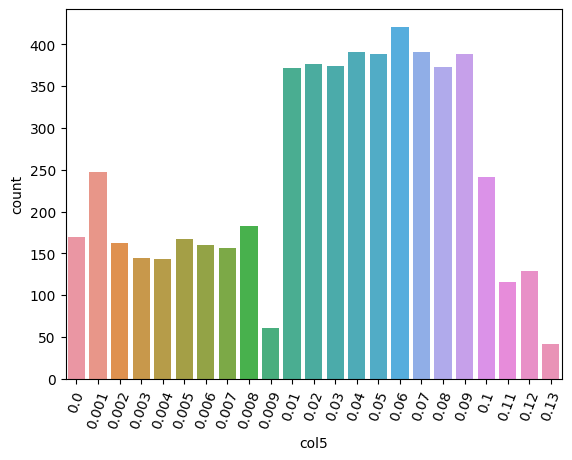

In [23]:
sns.countplot(data= train, x="col5" )
plt.xticks(rotation=70)

In [24]:
train["col6"].value_counts()

col6
0.09    162
0.02    160
0.04    153
0.05    151
0.03    142
       ... 
8.31      1
2.60      1
8.12      1
7.69      1
3.80      1
Name: count, Length: 784, dtype: int64

In [25]:
train["col6"].describe()

count    5597.000000
mean        2.213093
std         2.581244
min         0.000000
25%         0.100000
50%         0.550000
75%         4.330000
max         8.660000
Name: col6, dtype: float64

In [26]:
train["col7"].value_counts()

col7
0.06    345
0.08    334
0.07    333
0.03    333
0.04    323
       ... 
0.81     16
0.60     15
0.50     12
0.75     10
0.90      9
Name: count, Length: 91, dtype: int64

In [27]:
train["col7"].describe()

count    5597.000000
mean        0.250890
std         0.272472
min         0.000000
25%         0.050000
50%         0.090000
75%         0.450000
max         0.900000
Name: col7, dtype: float64

In [28]:
train["col8"].value_counts()

col8
0.05    176
0.04    164
0.08    157
0.02    147
0.06    144
       ... 
0.32      3
1.70      3
0.45      3
2.00      2
0.64      2
Name: count, Length: 201, dtype: int64

In [29]:
train["col8"].describe()

count    5597.000000
mean        0.807654
std         0.652471
min         0.000000
25%         0.090000
50%         0.750000
75%         1.390000
max         2.000000
Name: col8, dtype: float64

In [30]:
train["col9"].value_counts()

col9
1.43    88
0.63    76
0.33    69
1.39    68
0.79    67
        ..
0.35    13
1.11    13
0.39    13
1.22    12
0.60     4
Name: count, Length: 151, dtype: int64

In [31]:
train["col9"].describe()

count    5597.000000
mean        0.766057
std         0.436435
min         0.000000
25%         0.400000
50%         0.760000
75%         1.160000
max         1.500000
Name: col9, dtype: float64

In [32]:
train["col10"].value_counts()

col10
0.00    1937
0.84      61
0.89      59
0.13      57
0.75      56
        ... 
0.90      17
0.86      17
0.47      17
0.12      16
0.88      11
Name: count, Length: 101, dtype: int64

In [33]:
train["col10"].describe()

count    5597.000000
mean        0.324309
std         0.328954
min         0.000000
25%         0.000000
50%         0.230000
75%         0.610000
max         1.000000
Name: col10, dtype: float64

In [34]:
train["col11"].value_counts()

col11
0.000    921
0.001    312
0.008    303
0.002    291
0.005    258
        ... 
0.860     27
0.710     27
0.900     23
0.810     22
0.880     13
Name: count, Length: 61, dtype: int64

In [35]:
train["col11"].describe()

count    5597.000000
mean        0.329693
std         0.377353
min         0.000000
25%         0.002000
50%         0.008000
75%         0.700000
max         1.000000
Name: col11, dtype: float64

In [36]:
train["col12"].value_counts()

col12
0.001    198
0.105     57
0.075     56
0.100     56
0.097     55
        ... 
0.084      4
0.094      4
0.173      4
0.171      4
0.056      4
Name: count, Length: 199, dtype: int64

In [37]:
train["col12"].describe()

count    5597.000000
mean        0.100050
std         0.057997
min         0.001000
25%         0.049000
50%         0.103000
75%         0.151000
max         0.200000
Name: col12, dtype: float64

In [38]:
train["col13"].value_counts()

col13
8.50     14
10.90    13
7.85     12
4.94     12
16.88    12
         ..
12.96     1
1.17      1
2.25      1
19.71     1
8.15      1
Name: count, Length: 1664, dtype: int64

In [39]:
train["col13"].describe()

count    5597.000000
mean        9.819267
std         5.581795
min         0.010000
25%         4.940000
50%         9.860000
75%        14.690000
max        19.820000
Name: col13, dtype: float64

In [40]:
train["col14"].value_counts()

col14
1.36    62
1.20    58
1.58    55
1.37    55
1.77    53
        ..
2.65     1
2.51     1
2.64     1
2.58     1
2.57     1
Name: count, Length: 274, dtype: int64

In [41]:
train["col14"].describe()

count    5597.000000
mean        1.331880
std         0.568734
min         0.000000
25%         1.010000
50%         1.420000
75%         1.760000
max         2.890000
Name: col14, dtype: float64

In [42]:
train["col15"].value_counts()

col15
0.006    647
0.008    620
0.007    573
0.001    570
0.009    542
0.005    527
0.002    503
0.003    501
0.004    477
0.010    372
0.000    265
Name: count, dtype: int64

In [43]:
train["col15"].describe()

count    5597.000000
mean        0.005194
std         0.002960
min         0.000000
25%         0.003000
50%         0.005000
75%         0.008000
max         0.010000
Name: col15, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.001'),
  Text(2, 0, '0.002'),
  Text(3, 0, '0.003'),
  Text(4, 0, '0.004'),
  Text(5, 0, '0.005'),
  Text(6, 0, '0.006'),
  Text(7, 0, '0.007'),
  Text(8, 0, '0.008'),
  Text(9, 0, '0.009'),
  Text(10, 0, '0.01')])

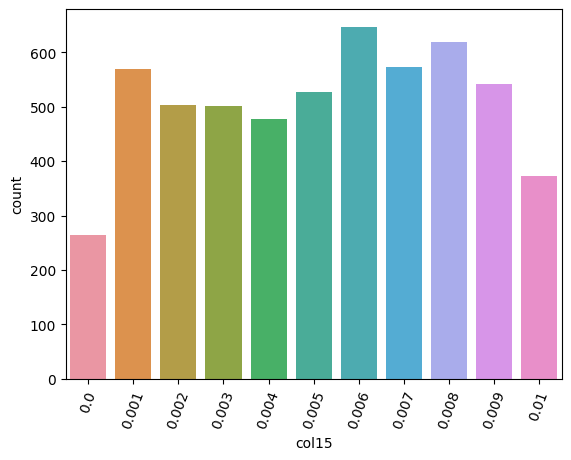

In [44]:
sns.countplot(data= train, x="col15" )
plt.xticks(rotation=70)

In [45]:
train["col16"].value_counts()

col16
0.18     21
0.05     20
0.10     18
0.35     17
0.34     17
         ..
3.41      1
6.32      1
54.24     1
31.16     1
17.18     1
Name: count, Length: 2562, dtype: int64

In [46]:
train["col16"].describe()

count    5597.000000
mean       16.621249
std        17.729833
min         0.000000
25%         2.220000
50%         7.840000
75%        29.980000
max        60.010000
Name: col16, dtype: float64

In [47]:
train["col17"].value_counts()

col17
0.06    34
0.27    29
0.96    27
0.82    27
0.15    27
        ..
2.70     1
4.46     1
4.19     1
6.01     1
5.44     1
Name: count, Length: 724, dtype: int64

In [48]:
train["col17"].describe()

count    5597.000000
mean        2.931896
std         2.327347
min         0.000000
25%         0.820000
50%         2.430000
75%         4.670000
max         7.990000
Name: col17, dtype: float64

In [49]:
train["col18"].value_counts()

col18
0.06    649
0.02    607
0.05    593
0.03    578
0.07    573
0.01    529
0.09    527
0.04    495
0.08    484
0.10    282
0.00    280
Name: count, dtype: int64

In [50]:
train["col18"].describe()

count    5597.000000
mean        0.049602
std         0.028827
min         0.000000
25%         0.020000
50%         0.050000
75%         0.070000
max         0.100000
Name: col18, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.02'),
  Text(3, 0, '0.03'),
  Text(4, 0, '0.04'),
  Text(5, 0, '0.05'),
  Text(6, 0, '0.06'),
  Text(7, 0, '0.07'),
  Text(8, 0, '0.08'),
  Text(9, 0, '0.09'),
  Text(10, 0, '0.1')])

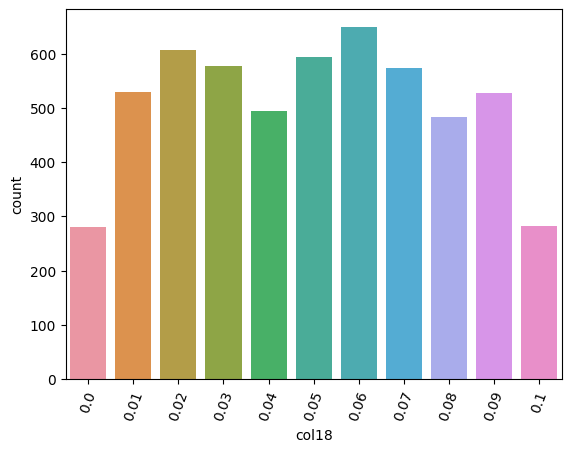

In [51]:
sns.countplot(data= train, x="col18" )
plt.xticks(rotation=70)

In [52]:
train["col19"].value_counts()

col19
0.09    346
0.04    346
0.06    346
0.01    342
0.07    337
0.03    335
0.02    329
0.05    320
0.08    317
0.00    167
0.10    164
0.12     91
0.42     81
0.18     79
0.11     74
0.33     70
0.37     70
0.27     69
0.20     69
0.49     68
0.21     64
0.31     62
0.41     61
0.24     61
0.35     60
0.13     60
0.45     58
0.23     57
0.16     56
0.47     56
0.34     55
0.15     55
0.44     54
0.40     54
0.36     52
0.26     51
0.38     51
0.48     50
0.19     50
0.39     50
0.17     50
0.29     49
0.28     49
0.22     47
0.32     46
0.25     44
0.46     42
0.30     40
0.43     37
0.14     29
0.50     27
Name: count, dtype: int64

In [53]:
train["col19"].describe()

count    5597.000000
mean        0.149855
std         0.144170
min         0.000000
25%         0.040000
50%         0.080000
75%         0.250000
max         0.500000
Name: col19, dtype: float64

In [54]:
train["col20"].value_counts()

col20
0.02    664
0.08    661
0.06    651
0.05    645
0.07    604
0.01    577
0.04    550
0.03    527
0.00    401
0.09    317
Name: count, dtype: int64

In [55]:
train["col20"].describe()

count    5597.000000
mean        0.044999
std         0.026929
min         0.000000
25%         0.020000
50%         0.050000
75%         0.070000
max         0.090000
Name: col20, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.02'),
  Text(3, 0, '0.03'),
  Text(4, 0, '0.04'),
  Text(5, 0, '0.05'),
  Text(6, 0, '0.06'),
  Text(7, 0, '0.07'),
  Text(8, 0, '0.08'),
  Text(9, 0, '0.09')])

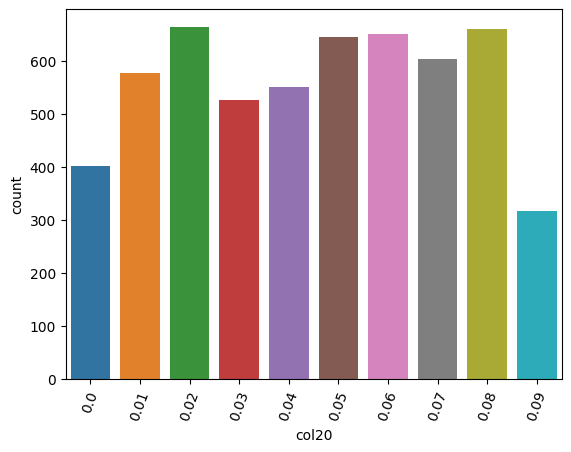

In [56]:
sns.countplot(data= train, x="col20" )
plt.xticks(rotation=70)

Comenzamos con el modelo de Regresión logística

In [57]:
X=train.drop("target", axis=1)
y=train["target"]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(x_train)

StandardScaler()

In [63]:
scaler_Xtrain = scaler.transform(x_train)

In [64]:
scaler_Xtest = scaler.transform(x_test)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()
model.fit(scaler_Xtrain, y_train)

LogisticRegression()

In [67]:
y_pred = model.predict_log_proba(scaler_Xtest)

In [68]:
y_pred=model.predict(scaler_Xtest)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [70]:
y_test

1633    0
4546    0
2506    0
3131    0
3366    0
       ..
1461    0
4812    0
3312    1
830     0
4140    0
Name: target, Length: 560, dtype: int64

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score,roc_auc_score

In [72]:
accuracy_score(y_test, y_pred)

0.9357142857142857

In [73]:
print(confusion_matrix(y_test, y_pred))

[[487   8]
 [ 28  37]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       495
           1       0.82      0.57      0.67        65

    accuracy                           0.94       560
   macro avg       0.88      0.78      0.82       560
weighted avg       0.93      0.94      0.93       560



In [75]:
precision_score(y_test, y_pred)

0.8222222222222222

In [76]:
recall_score(y_test, y_pred)

0.5692307692307692

In [77]:
y_probs = model.predict_proba(scaler_Xtest)

In [78]:
roc_auc_score(y_test,y_probs[:,1])

0.9214296814296814

In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.3734265734265735
MAE 0.06428571428571428
MAPE 64337137533864.27
MSE 0.06428571428571428
RMSE 0.253546276418555


Empezamos con el modelo decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(scaler_Xtrain,y_train)

DecisionTreeRegressor()

In [81]:
y_pred = dtr.predict(scaler_Xtest)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score,roc_auc_score

In [83]:
accuracy_score(y_test, y_pred)

0.9642857142857143

In [84]:
print(confusion_matrix(y_test, y_pred))

[[484  11]
 [  9  56]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       495
           1       0.84      0.86      0.85        65

    accuracy                           0.96       560
   macro avg       0.91      0.92      0.91       560
weighted avg       0.96      0.96      0.96       560



In [86]:
precision_score(y_test, y_pred)

0.835820895522388

In [87]:
recall_score(y_test, y_pred)

0.8615384615384616

In [88]:
y_probs = model.predict_proba(scaler_Xtest)

In [89]:
roc_auc_score(y_test,y_probs[:,1])

0.9214296814296814

In [90]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.651903651903652
MAE 0.03571428571428571
MAPE 88463564109063.31
MSE 0.03571428571428571
RMSE 0.1889822365046136


Modelo KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)


In [93]:
knn.fit(scaler_Xtrain, y_train)



KNeighborsClassifier()

In [94]:
y_pred = knn.predict(scaler_Xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score,roc_auc_score

In [96]:
accuracy_score(y_test, y_pred)

0.9196428571428571

In [97]:
confusion_matrix(y_test, y_pred)

array([[484,  11],
       [ 34,  31]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       495
           1       0.74      0.48      0.58        65

    accuracy                           0.92       560
   macro avg       0.84      0.73      0.77       560
weighted avg       0.91      0.92      0.91       560



In [99]:
precision_score(y_test, y_pred)

0.7380952380952381

In [100]:
recall_score(y_test, y_pred)

0.47692307692307695

In [101]:
y_probs = model.predict_proba(scaler_Xtest)

In [102]:
roc_auc_score(y_test,y_probs[:,1])

0.9214296814296814

In [103]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.21678321678321688
MAE 0.08035714285714286
MAPE 88463564109063.38
MSE 0.08035714285714286
RMSE 0.2834733547569204


Comenzamos el modelo SVM

In [104]:
from sklearn.svm import SVC


In [105]:
svm_clf = SVC(kernel='linear', C = float(10000000))

In [106]:
#svm_clf.fit(scaler_Xtrain, y_train)   lo quito pq se ha pasado 20 min calculando y no acababa de funcionar

In [107]:
y_pred = svm_clf.predict(scaler_Xtest)
y_pred

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.